In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Architecture 1:  Conlayers-2 
# kernel size 3*3

In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2580 - acc: 0.9219 - val_loss: 0.0524 - val_acc: 0.9831
Epoch 2/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0852 - acc: 0.9745 - val_loss: 0.0391 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0649 - acc: 0.9812 - val_loss: 0.0346 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0548 - acc: 0.9838 - val_loss: 0.0304 - val_acc: 0.9905
Epoch 5/12
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0463 - acc: 0.9860 - val_loss: 0.0308 - val_acc: 0.9893
Epoch 6/12
60000/60000 [======

# Architecture2: kernel 3*3 Conlayers 3 

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 125s 2ms/step - loss: 0.2741 - acc: 0.9131 - val_loss: 0.0524 - val_acc: 0.9829
Epoch 2/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0807 - acc: 0.9754 - val_loss: 0.0339 - val_acc: 0.9883
Epoch 3/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0608 - acc: 0.9812 - val_loss: 0.0272 - val_acc: 0.9911
Epoch 4/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0501 - acc: 0.9846 - val_loss: 0.0254 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0430 - acc: 0.9869 - val_loss: 0.0225 - val_acc: 0.9919
Epoch 6/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0403 - acc: 0.9877 - val_loss: 0.0221 - val_acc: 0.9921
Epoch 7/12
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0357 - acc: 0.9892 - val_loss: 0.0199 - 

 # Architecture3: kernel 3*3 Conlayers 3 droupout 0.25 and batch normalization

In [4]:
from keras.layers.normalization import BatchNormalization


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2693 - acc: 0.9150 - val_loss: 0.0537 - val_acc: 0.9830
Epoch 2/12
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0773 - acc: 0.9764 - val_loss: 0.0297 - val_acc: 0.9914
Epoch 3/12
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0582 - acc: 0.9826 - val_loss: 0.0282 - val_acc: 0.9910
Epoch 4/12
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0445 - acc: 0.9860 - val_loss: 0.0386 - val_acc: 0.9865
Epoch 5/12
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0407 - acc: 0.9879 - val_loss: 0.0264 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0369 - acc: 0.9885 - val_loss: 0.0209 - val_acc: 0.9927
Epoch 7/12
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0343 - acc: 0.9891 - val_loss: 0.0211 - 

# Architecture 4: kernel 5*5 Conlayers 5 batch normalization

In [14]:
from keras.layers.normalization import BatchNormalization


model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(32, (5, 5), padding='same',strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=None, padding='same', data_format=None))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1, padding='same', data_format=None))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (5, 5),padding='same',strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1, padding='same', data_format=None))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (5, 5),activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 735s 12ms/step - loss: 0.4790 - acc: 0.9320 - val_loss: 0.0606 - val_acc: 0.9864
Epoch 2/12
60000/60000 [==============================] - 733s 12ms/step - loss: 0.0751 - acc: 0.9815 - val_loss: 0.1089 - val_acc: 0.9766
Epoch 3/12
60000/60000 [==============================] - 703s 12ms/step - loss: 0.0545 - acc: 0.9867 - val_loss: 0.0681 - val_acc: 0.9850
Epoch 4/12
60000/60000 [==============================] - 706s 12ms/step - loss: 0.0432 - acc: 0.9892 - val_loss: 0.0295 - val_acc: 0.9933
Epoch 5/12
60000/60000 [==============================] - 725s 12ms/step - loss: 0.0348 - acc: 0.9908 - val_loss: 0.0304 - val_acc: 0.9938
Epoch 6/12
60000/60000 [==============================] - 720s 12ms/step - loss: 0.0299 - acc: 0.9924 - val_loss: 0.0428 - val_acc: 0.9900
Epoch 7/12
60000/60000 [==============================] - 724s 12ms/

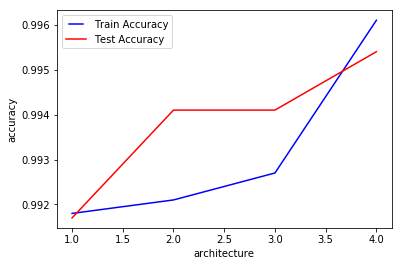

In [4]:
#plotting error plots for all the models

values =[1,2,3,4]
train_results=[0.9918,0.9921,0.9927,0.9961]
test_results=[0.9917,0.9941,0.9941,0.9954]

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(values, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(values, test_results, 'r', label="Test Accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("accuracy")
plt.xlabel("architecture")
plt.show()

#1.we can observe that for architecture 3 we get best results even model 2 give good results but among them model 3 is best .
2.For model 4 and model 1, we could observe that test accuracy is more train accuracy which indicates the accuracy for unseen data is more than the train data which is not common.

# conclusions


In [1]:

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["CNN- architecture ", "convulution layers", "kernel size",  "Regularization", "Train accuracy", "Test Accuracy"]

x.add_row(["Architecture 1", 2, "3*3", "Droupout", 0.9918, 0.9917])
x.add_row(["Architecture 2", 3, "3*3", "Droupout", 0.9921, 0.9941])
x.add_row(["Architecture 3", 3, "3*3", "Batch", 0.9927, 0.9941])
x.add_row(["Architecture 4", 5, "5*5", "Droupout+batch",0.9961 ,0.9954 ])


print(x)

+--------------------+--------------------+-------------+----------------+----------------+---------------+
| CNN- architecture  | convulution layers | kernel size | Regularization | Train accuracy | Test Accuracy |
+--------------------+--------------------+-------------+----------------+----------------+---------------+
|   Architecture 1   |         2          |     3*3     |    Droupout    |     0.9918     |     0.9917    |
|   Architecture 2   |         3          |     3*3     |    Droupout    |     0.9921     |     0.9941    |
|   Architecture 3   |         3          |     3*3     |     Batch      |     0.9927     |     0.9941    |
|   Architecture 4   |         5          |     5*5     | Droupout+batch |     0.9961     |     0.9954    |
+--------------------+--------------------+-------------+----------------+----------------+---------------+


In [ ]:
#We could observe with increase in kernel size as performance is increasing but it is taking longer time to execute 